### 폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())


print ('설정파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

font_list

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
29


['/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberati

In [ ]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')

### 라이브러리 호출

In [1]:
# 연산 처리  패키지
import pandas as pd
import numpy as np

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 통계분석 패키지
import statsmodels.api as sm

# 그래프 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# SMOTE를 사용한 oversampling
from imblearn.over_sampling import SMOTE, SMOTENC
from collections import Counter

### Data 불러오기

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error, precision_score, recall_score
import math

In [26]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

# 데이터 읽어오기
df = pd.read_csv("/content/drive/MyDrive/기계학습의이해/Dataset/고객별 사고 유무 기본 데이터.csv", encoding = "UTF-8", engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head(5)

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,유효대수,사고유무
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,1
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0


### Model 함수 정의

In [6]:
# 로지스틱 회귀 함수 (SMOTE X)
def logistic_classifier(X_train, X_test, y_train, y_test):

    # LogisticRegression 초기화
    model = LogisticRegression()

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1) # 양성 클래스에 대한 확률 추출

    # 평가지표
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    # 최적 threshold 값 & 그 때의 FPR 출력
    fper, tper, thresholds = roc_curve(y_test, y_proba)  # thresholds 별 fpr tpr 계산
    optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
    optimal_fpr = fper[optimal_idx]                      # 해당 index에 위치한 fpr값 저장
    optimal_threshold = thresholds[optimal_idx]

    # 최적 threshold로 진행할 때의 평가지표
    # y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)
    # accuracy = accuracy_score(y_test, y_optpred)
    # precision = precision_score(y_test, y_optpred)
    # recall = recall_score(y_test, y_optpred)
    # f1 = f1_score(y_test, y_optpred, average='weighted')

    return [accuracy, precision, recall, f1, auc, optimal_fpr]



In [7]:
# ROC 커브 그리는 함수
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

In [8]:
# 혼동행렬 시각화
def plot_counfusion_matrix(y_test, y_proba, thereshhold) :

    con_max = confusion_matrix(y_true = y_test,
                               y_pred=(y_proba > thereshhold),
                               labels=[1, 0])
                           # labels=[1, 0] 넣은 이유 :
                           # 0 = Negative, 1 = Positive를 의미하므로
                           # label을 설정하지 않으면 Positive와 Negative가 바뀐 채로 나옴

    sns.heatmap(con_max,
                xticklabels= ['positive','Negative'],
                yticklabels=['True','False'],
                annot=True,
                cbar=False,
                cmap='Blues',
                fmt='g',
                annot_kws={'size':7})
    plt.xlabel('Predict label',fontsize=18)
    plt.ylabel('True label',fontsize=18)

    plt.show()

In [9]:
# 로지스틱 회귀 시각화
def logistic_visual(X_train, X_test, y_train, y_test):

    # LogisticRegression 초기화
    model = LogisticRegression()


    # 모델 학습
    model.fit(X_train, y_train)


    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1) # 양성 클래스에 대한 확률 추출


    # ROC CURVE 그리기
    print("=============================  ROC CURVE  ====================================\n")
    fper, tper, thresholds = roc_curve(y_test, y_proba)
    plot_roc_curve(fper, tper)
    auc = roc_auc_score(y_test, y_proba)
    print(f"auc : {auc} \n\n")


    # 혼동행렬 출력
    print("================================ MODEL 결과 ================================\n")
    plot_counfusion_matrix(y_test, y_proba, 0.5) # LogisticRegression의 임계값 defalut = 0.5, 모델 튜닝으로 임계값 재설정 불가한듯

    # 평가지표
    print(f"accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"precision : {precision_score(y_test, y_pred)}")
    print(f"recall : {recall_score(y_test, y_pred)}")
    print(f"f1-score : {f1_score(y_test, y_pred, average='weighted')}")

    # 최적 threshold 값 & 그 때의 FPR 출력
    optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
    print('Optimal threshold:', thresholds[optimal_idx] , '\nOptimal FPR:', fper[optimal_idx], '\n\n')


    # 최적 threshold로 진행할 때의 평가지표
    print("================================ 최적 결과 ================================\n")
    plot_counfusion_matrix(y_test, y_proba, thresholds[optimal_idx])

    y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

    print(f"accuracy : {accuracy_score(y_test, y_optpred)}")
    print(f"precision : {precision_score(y_test, y_optpred)}")
    print(f"recall : {recall_score(y_test, y_optpred)}")
    print(f"f1-score : {f1_score(y_test, y_optpred, average='weighted')}")
    y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

    return model

### 데이터셋 생성

In [27]:
# 유효 뺴라 미친
df = df.drop(columns = ["유효대수"])
df

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,사고유무
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0
...,...,...,...,...,...,...,...,...,...,...,...,...
267772,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K,0
267773,40.0,2.0,1.0,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,0
267774,40.0,2.0,1.0,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입,1
267775,40.0,2.0,1.0,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입,0


In [28]:
# x, y 분리
yn_X = df.drop(columns = ["사고유무"])
yn_y = df["사고유무"]

#### One-Hot encoding

In [29]:
# One-Hot encoding 위해 수치형 변수를 문자로 변경

numeric = (yn_X.dtypes == np.float64) | (yn_X.dtypes == np.int64)
numeric_col = yn_X.columns[numeric].tolist()

for col_name in numeric_col:
  yn_X[col_name] = yn_X[col_name].astype(str)


# One-Hot Encoding
yn_dummy_X = pd.get_dummies(yn_X, dummy_na = True, drop_first = True)


# 계산을 위해 boolean 타입을 int로 변경

for col_name in yn_dummy_X.columns:
    yn_dummy_X[col_name] = yn_dummy_X[col_name].astype(int)

#### Label Encoding (수동 순서 반영)

In [30]:
yn_orderlabel_X = yn_X.copy()

# 연령대 수치로 그대로 사용
yn_orderlabel_X['연령대'] = yn_orderlabel_X['연령대'].apply(lambda x: int(str(x).replace(',', '').split('.')[0]))

# 남자는 1, 여자는 0
yn_orderlabel_X['성별'] = yn_orderlabel_X['성별'].apply(lambda x: 1 if int(str(x).replace('.','').split('.')[0]) == 2 else 0)

# 국산은 1, 외제는 0, 결측치는 1
yn_orderlabel_X['국산차량여부'] = yn_orderlabel_X['국산차량여부'].apply(lambda x: 1 if str(x) == "nan" else (0 if int(str(x).replace('.','').split('.')[0]) == 2 else 1))

# 신규 0, 무사고 1, 1회 2, 2회 3, 3회 4, 결측치 0 은 무사고로 편입
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: str(x).replace('0', 'N'))
yn_orderlabel_X['직전3년간사고건수'] = yn_orderlabel_X['직전3년간사고건수'].apply(lambda x: int(str(x).replace('Z', '0').replace('N', '1').replace('D', '2').replace('C', '3').replace('B', '4')))

# 차량 경과년수 길 수록 큰 값 배정
yn_orderlabel_X['차량경과년수'] = yn_orderlabel_X['차량경과년수'].apply(lambda x: int(str(x).replace('신차', '0').replace('5년이하', '1').replace('10년이하', '2').replace('10년이상', '3')))

# 차종 배기량 순으로 클 수록 큰 값 배정
yn_orderlabel_X['차종'] = yn_orderlabel_X['차종'].apply(lambda x: int(str(x).replace('소형A', '0').replace('소형B', '1').replace('중형', '2').replace('대형', '3').replace('다목적1종','4').replace('다목적2종','5').replace('기타','6')))

# 가입경력코드 int로 바꿔 그대로 사용 (7년 이상 : 8)
yn_orderlabel_X['가입경력코드'] = yn_orderlabel_X['가입경력코드'].apply(lambda x: int(str(x).split('.')[0]))

# 차량가입금액 미가입은 0, 이후 금액 클 수록 큰 값 배정
yn_orderlabel_X['차량가입금액'] = yn_orderlabel_X['차량가입금액'].apply(lambda x : int(str(x).replace('미가입','0').replace('5천만원이하','1').replace('1억이하','2').replace('1억이상','3')))

# 영상기록장치 특약 가입 1, 미가입 0
yn_orderlabel_X['영상기록장치특약가입'] = yn_orderlabel_X['영상기록장치특약가입'].apply(lambda x : 1 if str(x)=='가입' else 0)

# 마일리지 약정거리 미가입이 가장 주행거리가 길 것이라 예상, 거리 순으로 값 배정 후 미가입 6 배정
yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: str(x).replace('12000K','4').replace('15000K','5').replace('미가입','6'))
yn_orderlabel_X['마일리지약정거리'] = yn_orderlabel_X['마일리지약정거리'].apply(lambda x: int(str(x).replace('3000K', '0').replace('5000K', '1').replace('7000K', '2').replace('10000K', '3')))

# 운전자한정특별약관 자동 label encoding
le = LabelEncoder()
le = le.fit(yn_orderlabel_X["운전자한정특별약관"])
yn_orderlabel_X["운전자한정특별약관"] = le.transform(yn_orderlabel_X["운전자한정특별약관"])

yn_orderlabel_X

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리
0,0,0,1,4,0,6,3,8,1,1,5
1,0,0,1,1,0,6,5,8,0,0,5
2,0,0,1,1,0,6,4,5,1,1,6
3,0,0,1,1,3,2,4,2,1,0,5
4,0,0,1,0,1,5,4,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
267772,40,0,1,3,3,2,6,8,0,0,2
267773,40,0,1,3,1,0,0,8,1,1,5
267774,40,0,1,3,2,0,5,8,0,0,6
267775,40,0,1,3,1,1,6,7,1,1,6


은아

### 모델 실행 결과 (지금은 실행 X)

#### 기본 Logistic Regression

One-Hot Encoding

=============================  ROC CURVE  ====================================



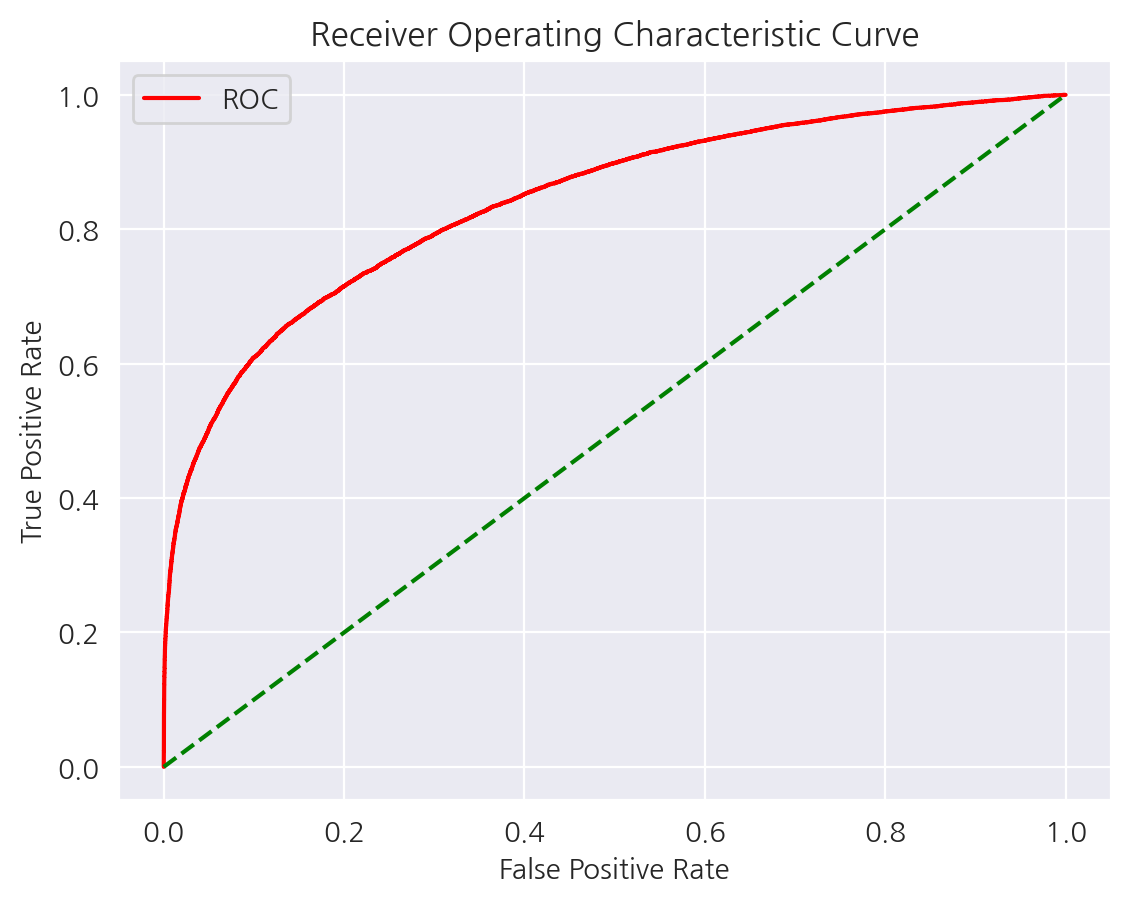

auc : 0.8404623166192549 


================================ MODEL 결과 ================================



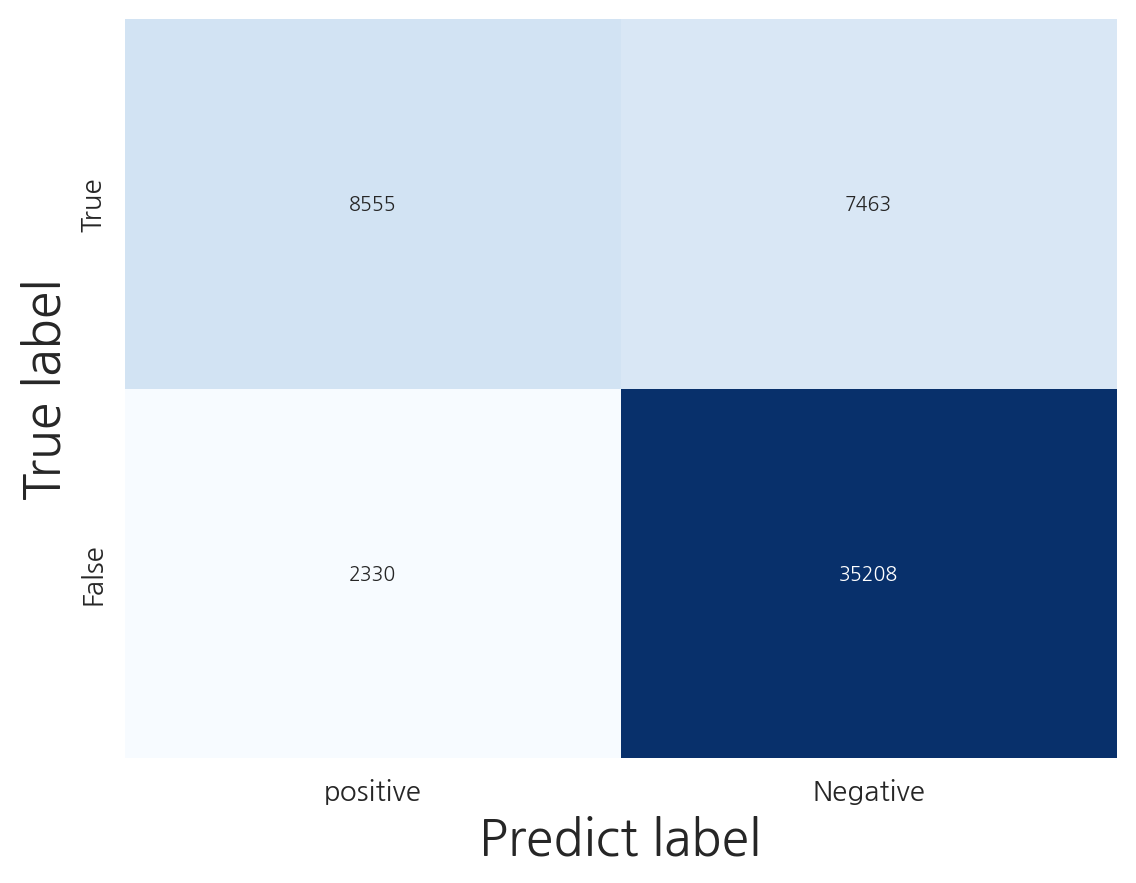

accuracy : 0.8171446709985809
precision : 0.7859439595774
recall : 0.5340866525159196
f1-score : 0.8055515285634693
Optimal threshold: 0.33593876854638605 
Optimal FPR: 0.1376471841866908 


================================ 최적 결과 ================================



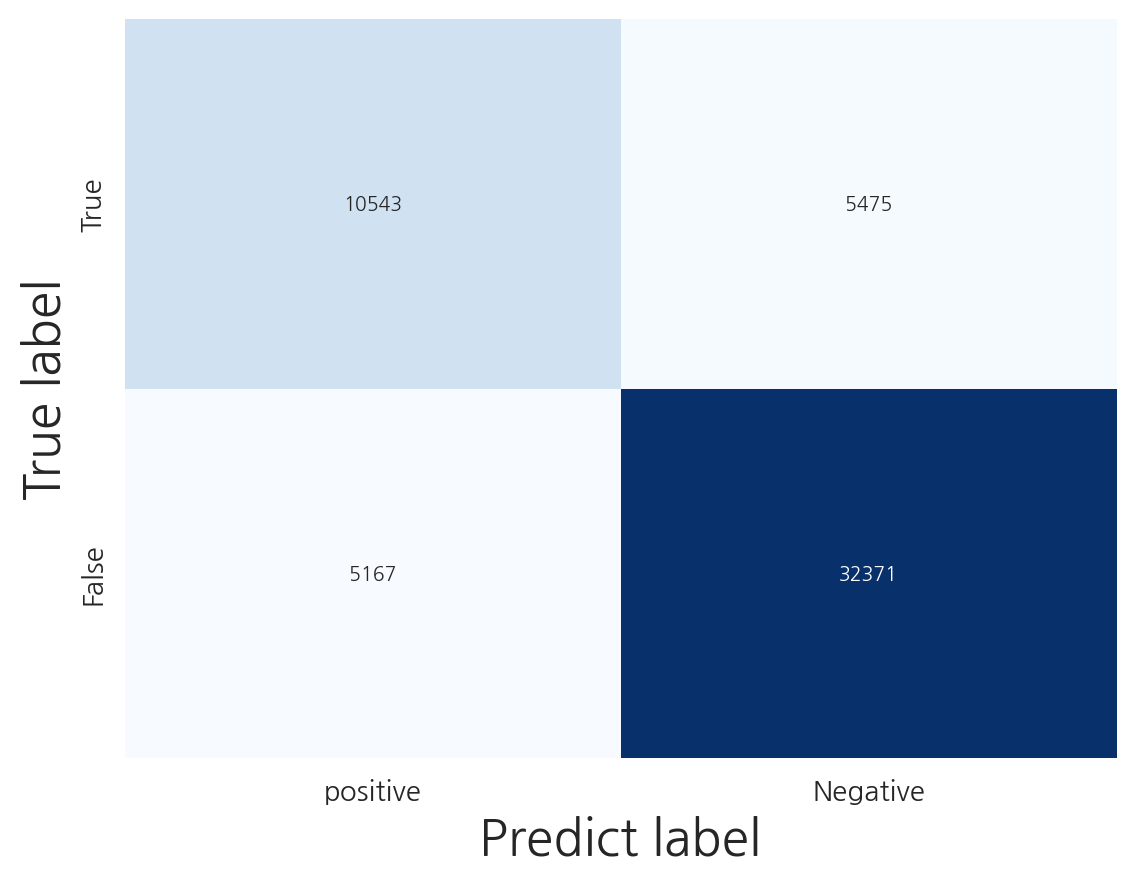

accuracy : 0.8012921054597058
precision : 0.6711012094207511
recall : 0.658197028343114
f1-score : 0.8007335607942125


LogisticRegression()

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y)

# model fit
logistic_visual(X_train, X_test, y_train, y_test)

수동 Label Encoding

=============================  ROC CURVE  ====================================



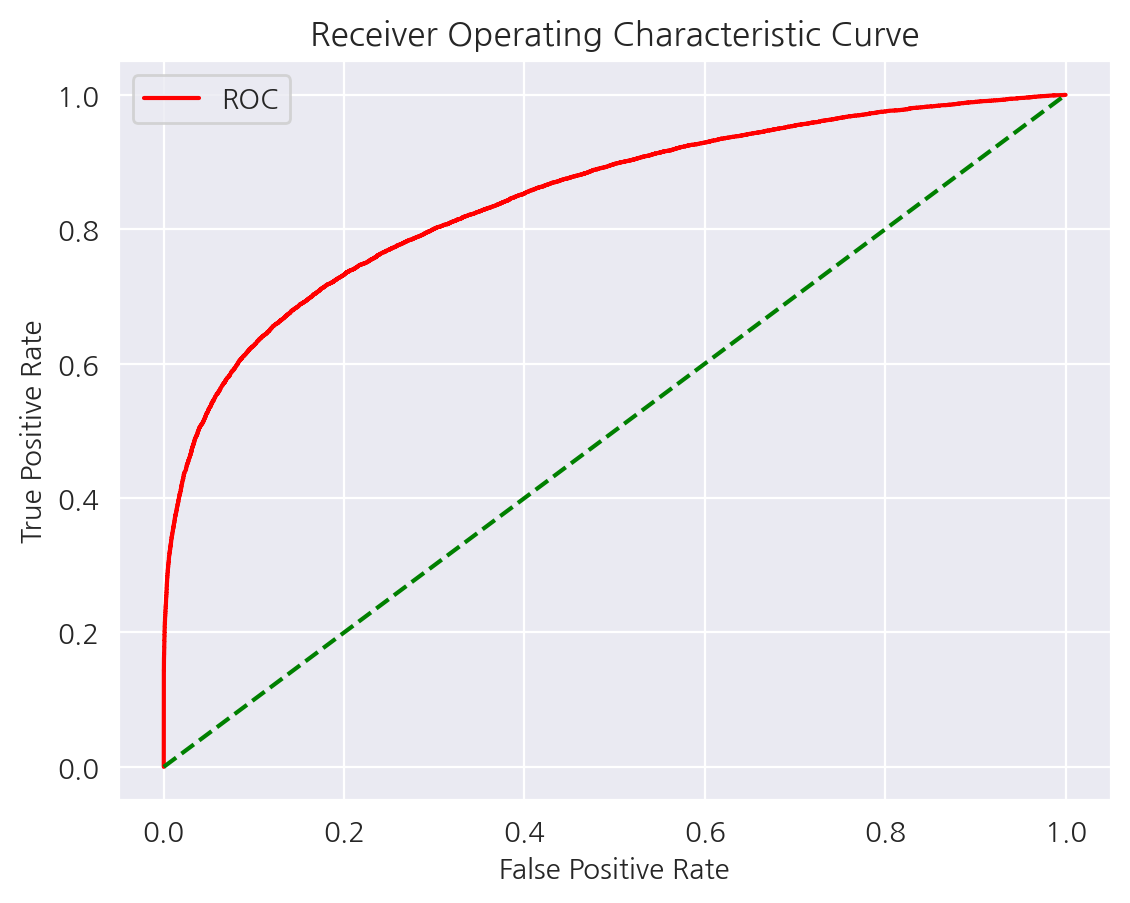

auc : 0.8459349272813463 


================================ MODEL 결과 ================================



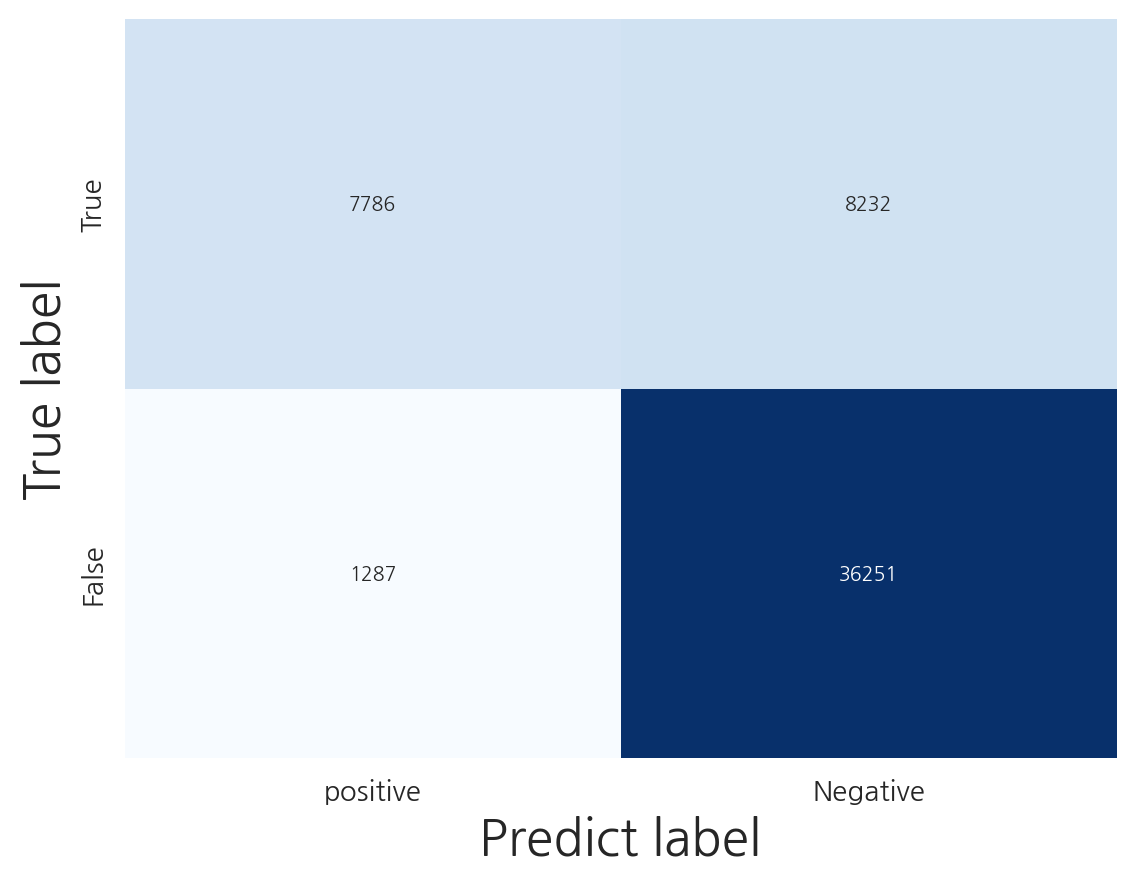

accuracy : 0.8222608111136007
precision : 0.8581505565964951
recall : 0.48607816206767385
f1-score : 0.8051872701129134
Optimal threshold: 0.25274858819679974 
Optimal FPR: 0.15038094730672918 


================================ 최적 결과 ================================



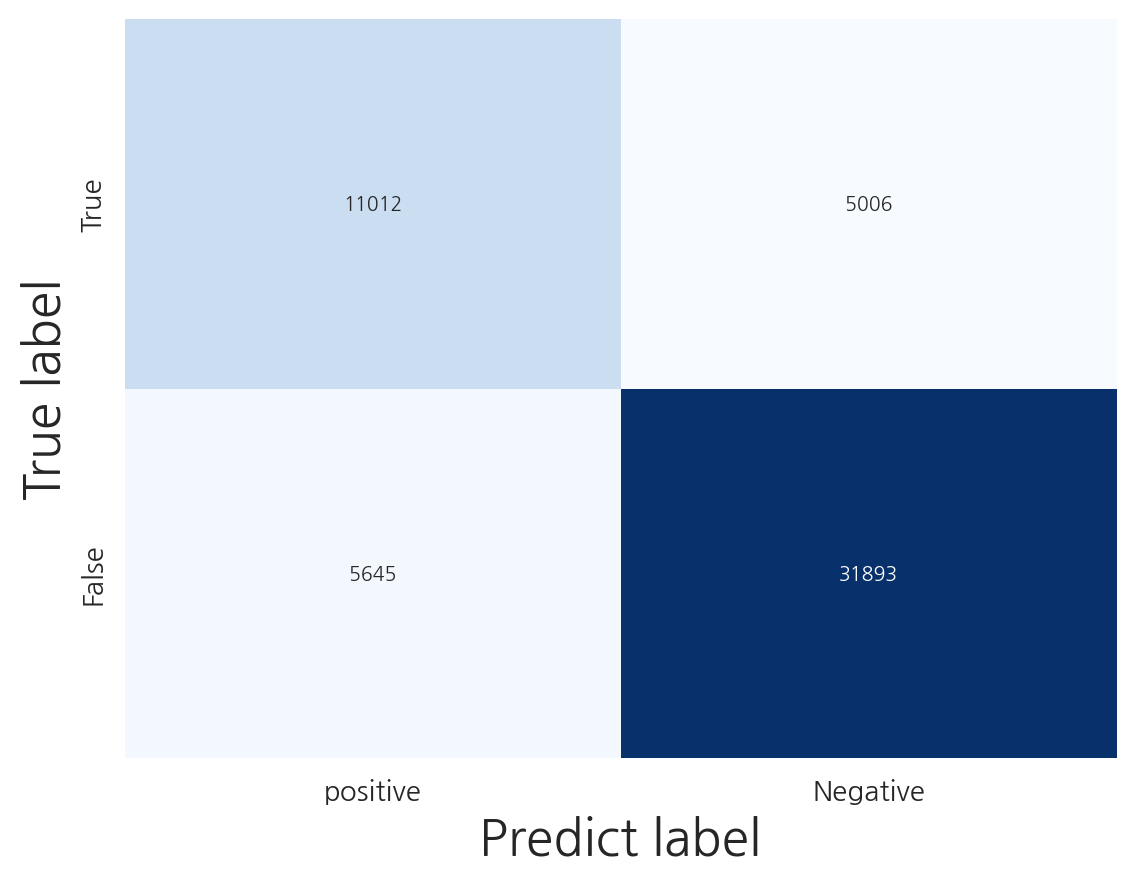

accuracy : 0.8011240570617671
precision : 0.6611034399951972
recall : 0.6874765888375578
f1-score : 0.8022150701119307


LogisticRegression()

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y)

# model fit
# logistic_classifier(X_train, X_test, y_train, y_test)
logistic_visual(X_train, X_test, y_train, y_test)

#### Oversampling 후 Logistic Regression

One-Hot Encoding

In [ ]:
# SMOTE를 사용한 oversampling
from imblearn.over_sampling import SMOTE, SMOTENC
from collections import Counter

In [ ]:
# smote 정의
smt = SMOTE(sampling_strategy = 'auto')

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y)

counter = Counter(y_train)
print("====================== Data Oversampling ============================")
print('Before : ', counter)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After : ", counter, "\n\n")

# model fit
# logistic_classifier(X_train_sm, X_test, y_train_sm, y_test)
logistic_visual(X_train_sm, X_test, y_train_sm, y_test)

====================== Data Oversampling ============================
Before :  Counter({0: 150149, 1: 64072})
After :  Counter({0: 150149, 1: 150149}) 




수동 Label Encoding

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, yn_y,
                                                    test_size = 0.2, stratify = yn_y,
                                                    random_state = 39)

counter = Counter(y_train)
print("====================== Data Oversampling ============================")
print('Before : ', counter)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After : ", counter, "\n\n")

# model fit
# logistic_classifier(X_train_sm, X_test, y_train_sm, y_test)
logistic_visual(X_train_sm, X_test, y_train_sm, y_test)

### BOXPLOT

In [31]:
# 로지스틱 boxplot
def logistic_boxplot(X_train, X_test, y_train, y_test):

    # LogisticRegression 초기화
    model = LogisticRegression()

    # 모델 학습
    model.fit(X_train_sm, y_train_sm)

    # 예측
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1) # 양성 클래스에 대한 확률 추출

    # 평가지표
    auc = roc_auc_score(y_test, y_proba)

    a_acc = accuracy_score(y_test, y_pred)
    a_pre = precision_score(y_test, y_pred)
    a_recall = recall_score(y_test, y_pred)
    a_f1 = f1_score(y_test, y_pred, average='weighted')

    # 최적 threshold 값
    fper, tper, thresholds = roc_curve(y_test, y_proba)
    optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
    y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

    b_acc = accuracy_score(y_test, y_optpred)
    b_pre = precision_score(y_test, y_optpred)
    b_recall = recall_score(y_test, y_optpred)
    b_f1 = f1_score(y_test, y_optpred, average='weighted')

    return (a_acc, a_pre, a_recall, a_f1, b_acc, b_pre, b_recall, b_f1)

In [32]:
# onehot 100번 반복

a_acc_list = []
a_pre_list = []
a_recall_list = []
a_f1_list = []

b_acc_list = []
b_pre_list = []
b_recall_list = []
b_f1_list = []

for i in range(100):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(yn_dummy_X, yn_y,
                                                        test_size = 0.2, stratify = yn_y)

    # sampling
    X_train_temp = X_train.sample(n = 8000)
    yn_y_temp = yn_y.loc[X_train_temp.index]

    # smote
    smt = SMOTE(sampling_strategy = 'auto')
    X_train_sm, y_train_sm = smt.fit_resample(X_train_temp, yn_y_temp)

    # model fit
    a = logistic_boxplot(X_train_sm, X_test, y_train_sm, y_test)
    a_acc_list.append(a[0])
    a_pre_list.append(a[1])
    a_recall_list.append(a[2])
    a_f1_list.append(a[3])

    b_acc_list.append(a[4])
    b_pre_list.append(a[5])
    b_recall_list.append(a[6])
    b_f1_list.append(a[7])

    if((i+1)%10 == 0) :
            print(f"{i+1}번째 완료")

# 결과 DataFrame 생성
results = pd.DataFrame({
    'acc' : a_acc_list,
    'prec': a_pre_list,
    'recall': a_recall_list,
    'f1-score' : a_f1_list,
    'opt_acc' : b_acc_list,
    'opt_prec' : b_pre_list,
    'opt_recall' : b_recall_list,
    'opt_f1-score': b_f1_list
})

10번째 완료
20번째 완료
30번째 완료
40번째 완료
50번째 완료
60번째 완료
70번째 완료
80번째 완료
90번째 완료
100번째 완료


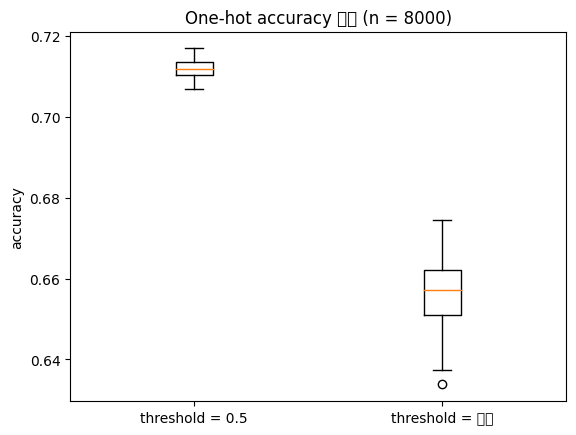

In [33]:
# boxplot 그리기
plt.boxplot([a_acc_list, b_acc_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('One-hot accuracy 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

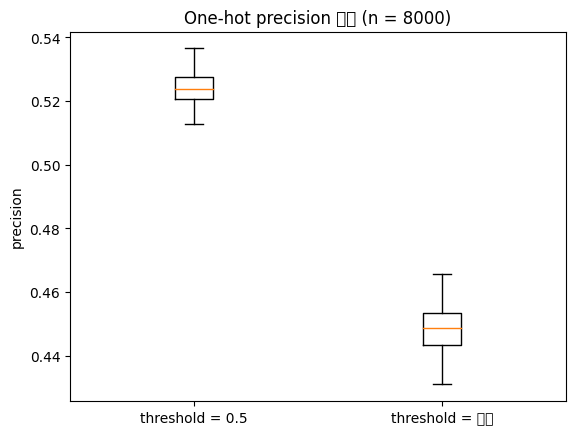

In [34]:
# boxplot 그리기
plt.boxplot([a_pre_list, b_pre_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('One-hot precision 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

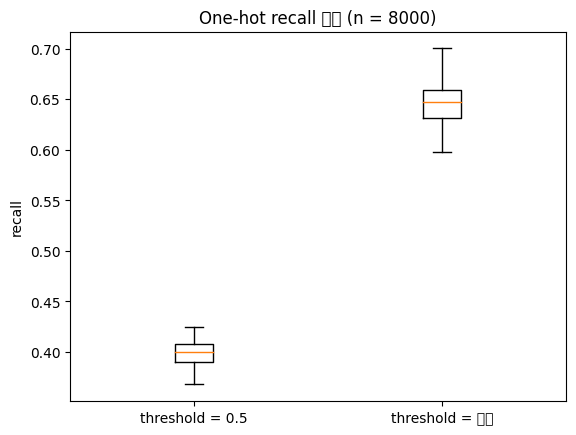

In [35]:
# boxplot 그리기
plt.boxplot([a_recall_list, b_recall_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('One-hot recall 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

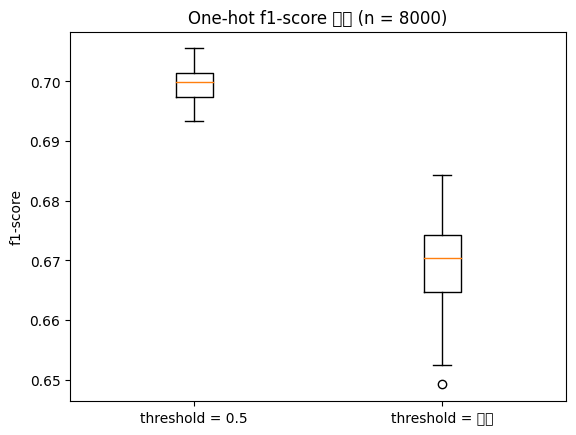

In [36]:
# boxplot 그리기
plt.boxplot([a_f1_list, b_f1_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('f1-score')  # y축 레이블 설정
plt.title('One-hot f1-score 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

In [37]:
# handled label 100번 반복

a_acc_list = []
a_pre_list = []
a_recall_list = []
a_f1_list = []

b_acc_list = []
b_pre_list = []
b_recall_list = []
b_f1_list = []

for i in range(100):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(yn_orderlabel_X, yn_y,
                                                        test_size = 0.2, stratify = yn_y)

    # smote
    X_train_temp = X_train.sample(n = 8000)
    yn_y_temp = yn_y.loc[X_train_temp.index]
    smt = SMOTE(sampling_strategy = 'auto')
    X_train_sm, y_train_sm = smt.fit_resample(X_train_temp, yn_y_temp)

    # model fit
    a = logistic_boxplot(X_train_sm, X_test, y_train_sm, y_test)
    a_acc_list.append(a[0])
    a_pre_list.append(a[1])
    a_recall_list.append(a[2])
    a_f1_list.append(a[3])

    b_acc_list.append(a[4])
    b_pre_list.append(a[5])
    b_recall_list.append(a[6])
    b_f1_list.append(a[7])

    if((i+1)%10 == 0) :
            print(f"{i+1}번째 완료")

# 결과 DataFrame 생성
results = pd.DataFrame({
    'acc' : a_acc_list,
    'prec': a_pre_list,
    'recall': a_recall_list,
    'f1-score' : a_f1_list,
    'opt_acc' : b_acc_list,
    'opt_prec' : b_pre_list,
    'opt_recall' : b_recall_list,
    'opt_f1-score': b_f1_list
})

10번째 완료
20번째 완료
30번째 완료
40번째 완료
50번째 완료
60번째 완료
70번째 완료
80번째 완료
90번째 완료
100번째 완료


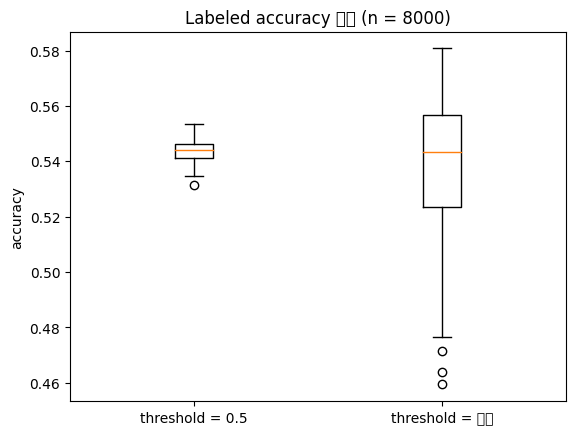

In [38]:
# boxplot 그리기
plt.boxplot([a_acc_list, b_acc_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('Labeled accuracy 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

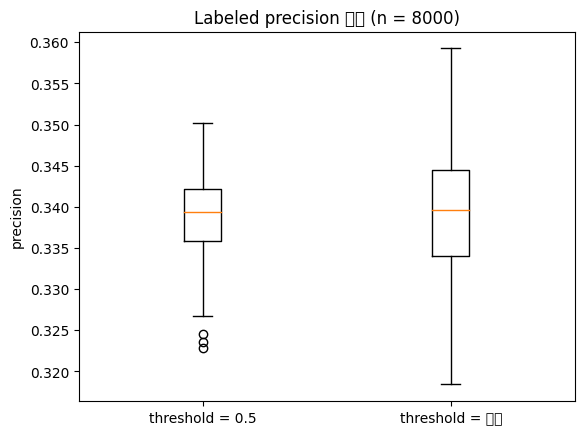

In [39]:
# boxplot 그리기
plt.boxplot([a_pre_list, b_pre_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('Labeled precision 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

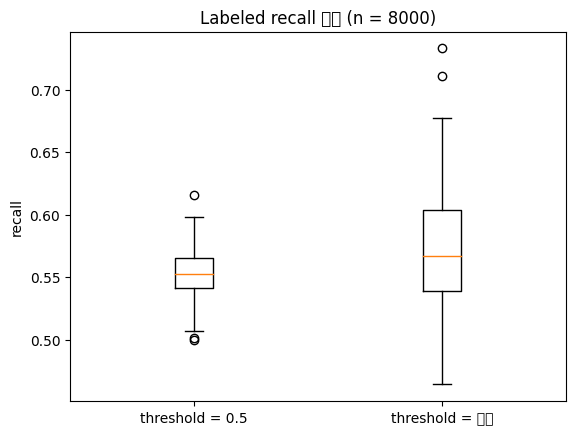

In [40]:
# boxplot 그리기
plt.boxplot([a_recall_list, b_recall_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('Labeled recall 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

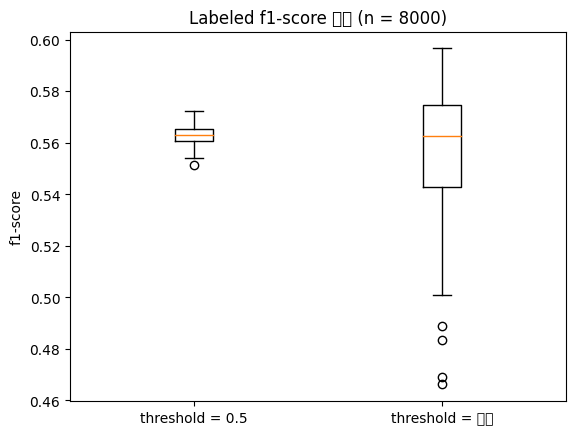

In [41]:
# boxplot 그리기
plt.boxplot([a_f1_list, b_f1_list])

# 그래프에 레이블 추가
plt.xticks([1, 2], ['threshold = 0.5', 'threshold = 최적'])  # x축 레이블 설정
plt.ylabel('f1-score')  # y축 레이블 설정
plt.title('Labeled f1-score 비교 (n = 8000)')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()